In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import requests

I used the starter code from the website and I am using EXPD symbol

In [2]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol=EXPD&outprize=full&apikey=HKN3PO1G7S4CC54Q'
r = requests.get(url)
data = r.json()

print(type(data))

<class 'dict'>


we have 1255 data samples

In [3]:
print(len(data['Weekly Adjusted Time Series']))

1255


# Task 1

In [4]:
time_series_data = data['Weekly Adjusted Time Series']

# Initializing an empty list to store data samples
dfs = []

# Iterating through dates and appending data to the list
for date, time_series in time_series_data.items():
    df = pd.DataFrame({
        'Date': [date],
        'Open': [float(time_series['1. open'])],
        'High': [float(time_series['2. high'])],
        'Low': [float(time_series['3. low'])],
        'Close': [float(time_series['4. close'])],
        'Adjusted Close': [float(time_series['5. adjusted close'])],
        'Volume': [float(time_series['6. volume'])],
        'Dividend Amount': [float(time_series['7. dividend amount'])]
    })
    dfs.append(df)

result_df = pd.concat(dfs, ignore_index=True)

print(result_df)

            Date    Open     High     Low   Close  Adjusted Close     Volume  \
0     2023-11-24  118.91  118.910  116.54  118.13        118.1300  4118209.0   
1     2023-11-17  115.11  119.200  113.54  118.98        118.9800  6917133.0   
2     2023-11-10  113.25  115.650  107.03  115.35        115.3500  7582983.0   
3     2023-11-03  108.55  114.585  107.73  112.95        112.9500  6493605.0   
4     2023-10-27  114.40  114.980  107.18  107.75        107.7500  6206650.0   
...          ...     ...      ...     ...     ...             ...        ...   
1250  1999-12-10   43.13   43.500   40.75   41.13          8.1748  1142700.0   
1251  1999-12-03   40.38   46.380   38.75   43.13          8.5723  2131800.0   
1252  1999-11-26   39.56   42.250   39.06   40.00          7.9403   553800.0   
1253  1999-11-19   39.38   42.630   38.25   39.38          7.8173   928500.0   
1254  1999-11-12   36.56   39.500   36.56   39.25          7.7915   723800.0   

      Dividend Amount  
0              

# Task 2

Splitting the data to training and test

In [5]:
# Splitting the data
X = result_df.iloc[:, 1:-1]  # 6 Features
y = result_df['Dividend Amount']  # Target (last) feature - Dividend Amount

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False) # no shuffling, otherwise data loses it's sequential character


print("Training Data:")
print(X_train)
print(y_train)

print("\nTesting Data:")
print(X_test)
print(y_test)

Training Data:
        Open     High     Low   Close  Adjusted Close     Volume
0     118.91  118.910  116.54  118.13        118.1300  4118209.0
1     115.11  119.200  113.54  118.98        118.9800  6917133.0
2     113.25  115.650  107.03  115.35        115.3500  7582983.0
3     108.55  114.585  107.73  112.95        112.9500  6493605.0
4     114.40  114.980  107.18  107.75        107.7500  6206650.0
...      ...      ...     ...     ...             ...        ...
999    51.17   53.340   50.26   52.97         21.4233  4438100.0
1000   50.89   51.750   49.77   51.38         20.7802  2473600.0
1001   49.96   51.050   49.56   50.92         20.5942  4120400.0
1002   49.03   50.700   49.02   49.75         20.1210  2013800.0
1003   48.88   50.000   48.26   49.11         19.8621  2801400.0

[1004 rows x 6 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
999     0.0
1000    0.0
1001    0.0
1002    0.0
1003    0.0
Name: Dividend Amount, Length: 1004, dtype: floa

Calculating mean and str of training data and standartizing all features.

In [6]:
# Calculating mean and standard deviation for each feature in the training set
mean_values_X = X_train.mean()
std_values_X = X_train.std()

mean_values_y = y_train.mean()
std_values_y = y_train.std()


# Standardizing the training set
X_train_standardized = (X_train - mean_values_X) / std_values_X
y_train_standardized = (y_train - mean_values_y) / std_values_y


# Standardizing the test set using mean and std calculated on the training set
X_test_standardized = (X_test - mean_values_X) / std_values_X
y_test_standardized = (y_test - mean_values_y) / std_values_y


print("Training Data (Standardized):")
print(X_train_standardized)
print(y_train_standardized)

print("\nTesting Data (Standardized):")
print(X_test_standardized)
print(y_test_standardized)

Training Data (Standardized):
          Open      High       Low     Close  Adjusted Close    Volume
0     2.260810  2.143815  2.286007  2.217163        2.296970 -0.804477
1     2.113478  2.154797  2.166865  2.250000        2.326913 -0.106059
2     2.041363  2.020363  1.908327  2.109768        2.199040  0.060091
3     1.859136  1.980033  1.936127  2.017052        2.114496 -0.211742
4     2.085950  1.994991  1.914284  1.816167        1.931317 -0.283347
...        ...       ...       ...       ...             ...       ...
999  -0.365580 -0.339236 -0.346241 -0.300073       -1.109689 -0.724655
1000 -0.376436 -0.399448 -0.365701 -0.361497       -1.132343 -1.214858
1001 -0.412494 -0.425956 -0.374041 -0.379267       -1.138895 -0.803931
1002 -0.448551 -0.439210 -0.395486 -0.424466       -1.155564 -1.329593
1003 -0.454367 -0.465718 -0.425669 -0.449191       -1.164685 -1.133062

[1004 rows x 6 columns]
0      -0.177137
1      -0.177137
2      -0.177137
3      -0.177137
4      -0.177137
        

# Task 3,4

So, the formula given is formula of Recurrent Neural Network (RNN), so I used SimpleRNN layer of Tensorflow. The loss function is custom_loss from the pdf implemented using tensorflow.

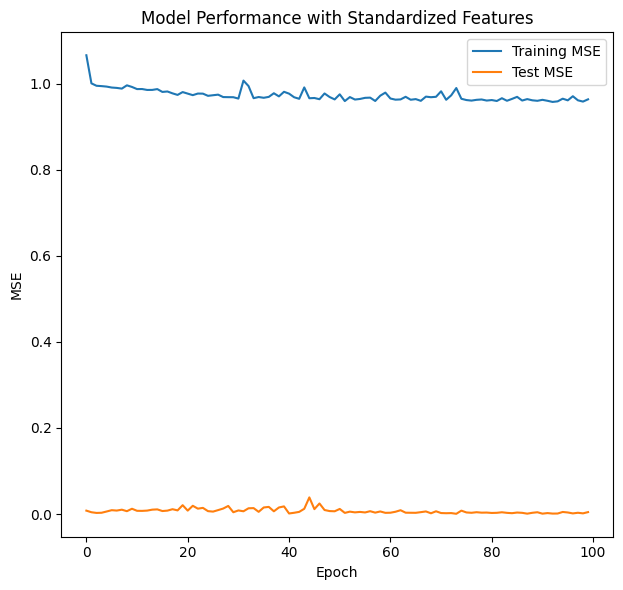

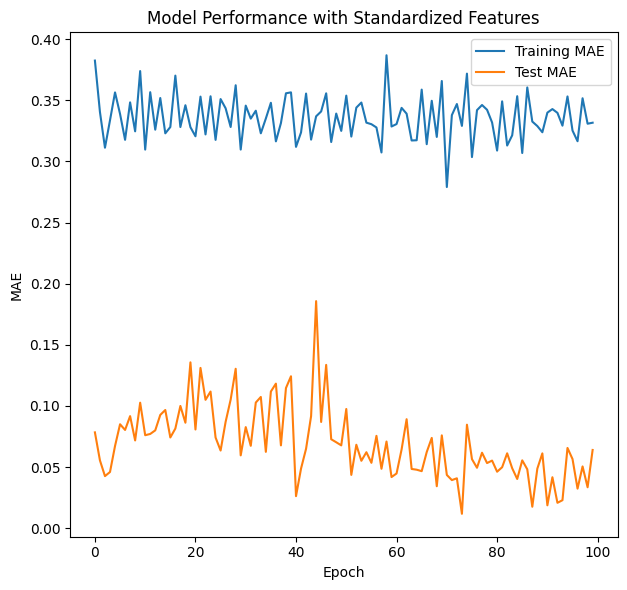

In [7]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

learning_rate = 0.01
epochs = 100


def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Reshape the data to be suitable for an RNN
X_train_reshaped = np.expand_dims(X_train_standardized.values, axis=1)
y_train_reshaped = np.expand_dims(y_train_standardized.values, axis=1)
X_test_reshaped = np.expand_dims(X_test_standardized.values, axis=1)


def create_model(input_size):
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(6, activation='relu', input_shape=(None, input_size), return_sequences=True),
        tf.keras.layers.SimpleRNN(6, activation='relu', return_sequences=False),
        tf.keras.layers.Dense(1, activation='linear')
    ])
    return model


model = create_model(input_size=6)
# Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss=custom_loss, metrics=['mae'])
history = model.fit(X_train_reshaped, y_train_reshaped, epochs=epochs, verbose=0, validation_data=(X_test_reshaped, y_test))


# Plot MSE for standardized features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.title('Model Performance with Standardized Features')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()


plt.tight_layout()
plt.show()

# Plot MAE for standardized features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.title('Model Performance with Standardized Features')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


# Task 5

Applying L1, L2 regularizations and training new model

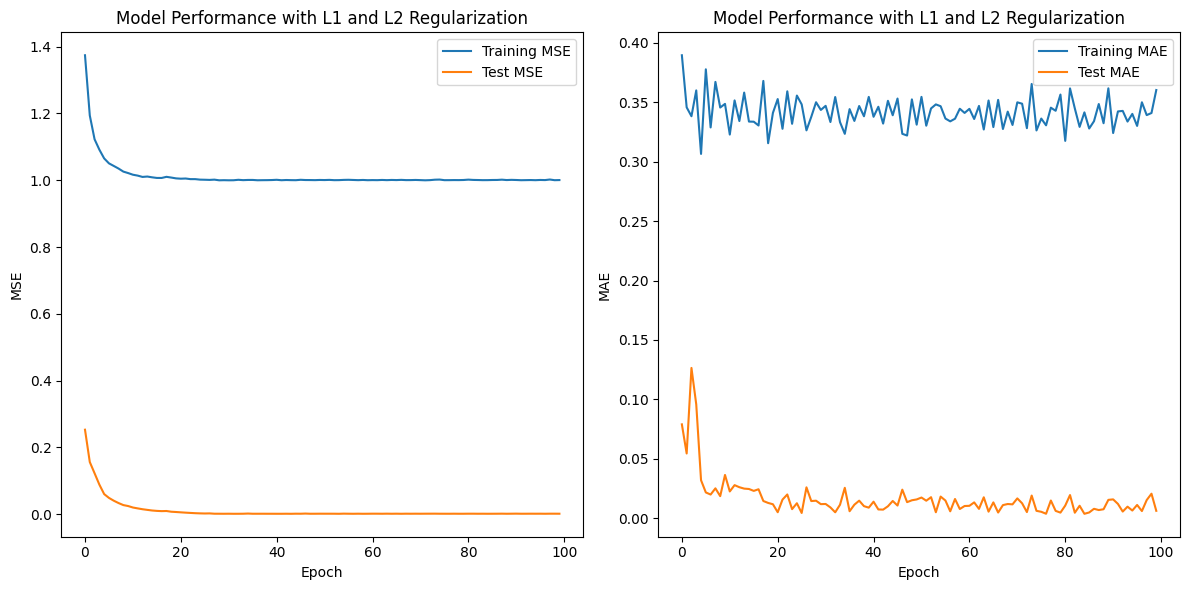

In [8]:
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Hyperparameters
learning_rate = 0.01
epochs = 100
l1_penalty = 0.01  # Adjust as needed
l2_penalty = 0.01  # Adjust as needed

# Function to create the model with L1 and L2 regularization
def create_model_reqularized(input_size):
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(6, activation='relu', input_shape=(None, input_size), return_sequences=True,
                                  kernel_regularizer=l1(l1_penalty), recurrent_regularizer=l2(l2_penalty)),
        tf.keras.layers.SimpleRNN(6, activation='relu', return_sequences=False,
                                  kernel_regularizer=l1(l1_penalty), recurrent_regularizer=l2(l2_penalty)),
        tf.keras.layers.Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1_penalty, l2=l2_penalty))
    ])
    return model


model_reqularized = create_model_reqularized(input_size=6)
model_reqularized.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mse', metrics=['mae'])
history_reqularized = model_reqularized.fit(X_train_reshaped, y_train_reshaped, epochs=epochs, verbose=0, validation_data=(X_test_reshaped, y_test))


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_reqularized.history['loss'], label='Training MSE')
plt.plot(history_reqularized.history['val_loss'], label='Test MSE')
plt.title('Model Performance with L1 and L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Plot MAE for standardized features
plt.subplot(1, 2, 2)
plt.plot(history_reqularized.history['mae'], label='Training MAE')
plt.plot(history_reqularized.history['val_mae'], label='Test MAE')
plt.title('Model Performance with L1 and L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()




# Task 6

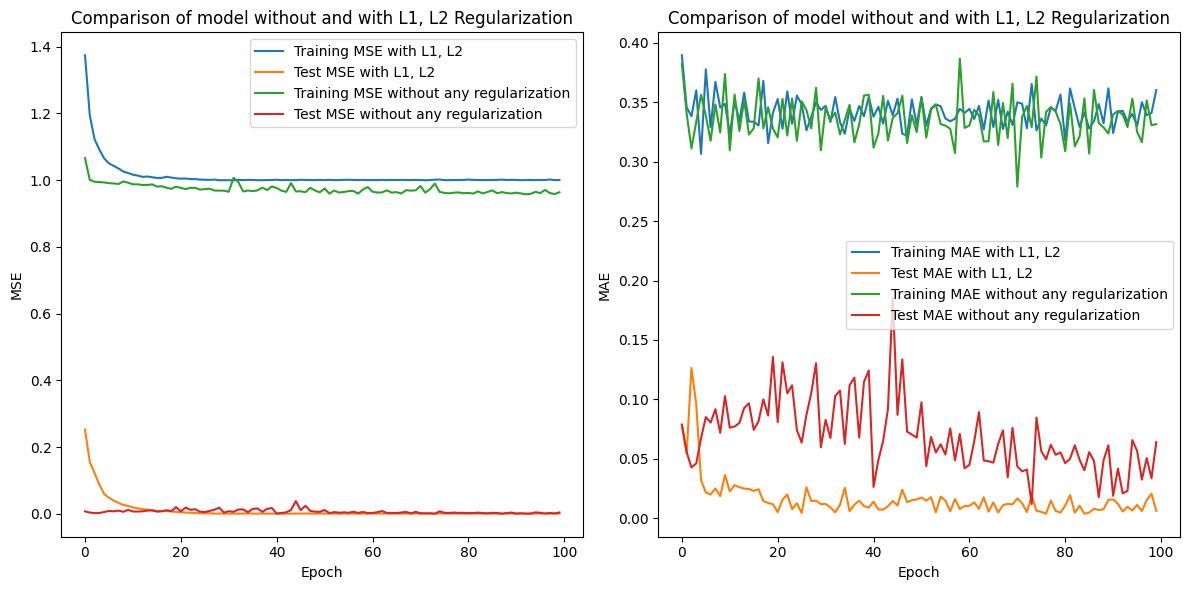

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_reqularized.history['loss'], label='Training MSE with L1, L2')
plt.plot(history_reqularized.history['val_loss'], label='Test MSE with L1, L2')
plt.plot(history.history['loss'], label='Training MSE without any regularization')
plt.plot(history.history['val_loss'], label='Test MSE without any regularization')
plt.title('Comparison of model without and with L1, L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Plot MAE for standardized features
plt.subplot(1, 2, 2)
plt.plot(history_reqularized.history['mae'], label='Training MAE with L1, L2')
plt.plot(history_reqularized.history['val_mae'], label='Test MAE with L1, L2')
plt.plot(history.history['mae'], label='Training MAE without any regularization')
plt.plot(history.history['val_mae'], label='Test MAE without any regularization')
plt.title('Comparison of model without and with L1, L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


So, from the graphs above, we see that the training errors of both models are almost the same. Model with and wuthout regularization has the same test MSE error. However, the model with L1, L2 regularizations has less MAE error on test data compaaring to model without any regularizations. Overall, the model with L1, L2 regularizations is slightly better than simple model without regularizations.